In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('R:/Jupyter/Bitcoin/dataset.csv')

In [10]:
print(df.head())

           Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB
None


In [12]:
print(df.isnull().sum())

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64


In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df.set_index('Date', inplace=True)

In [16]:
import matplotlib.pyplot as plt

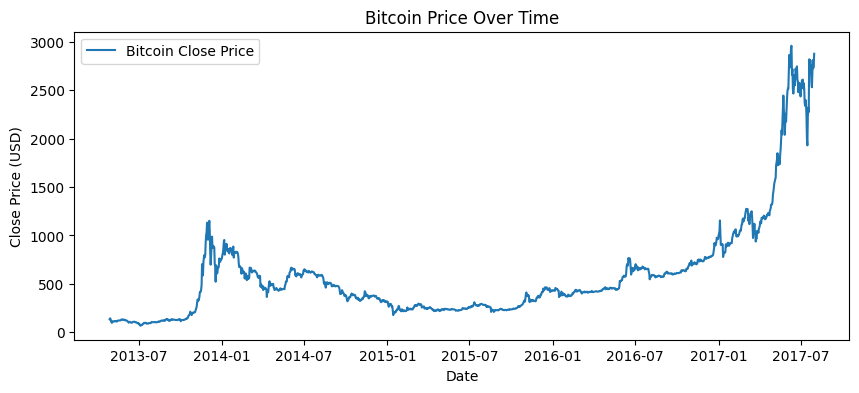

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Bitcoin Close Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

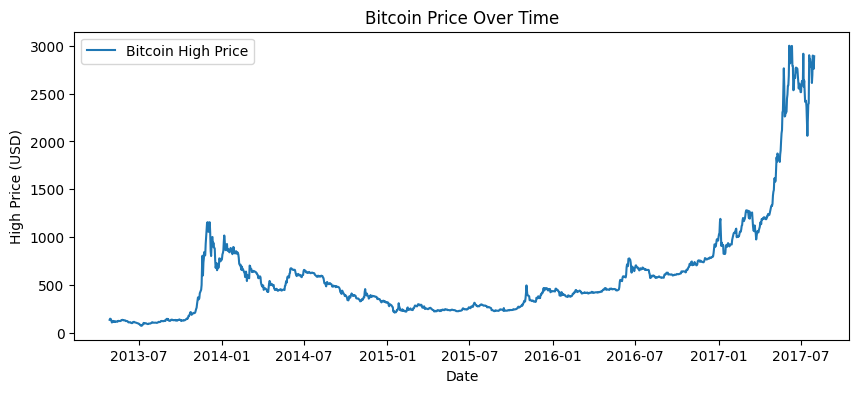

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(df['High'], label='Bitcoin High Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price (USD)')
plt.legend()
plt.show()

In [23]:
df['MA7'] = df['Close'].rolling(window=7).mean()

In [24]:
df['MA30'] = df['Close'].rolling(window=30).mean()

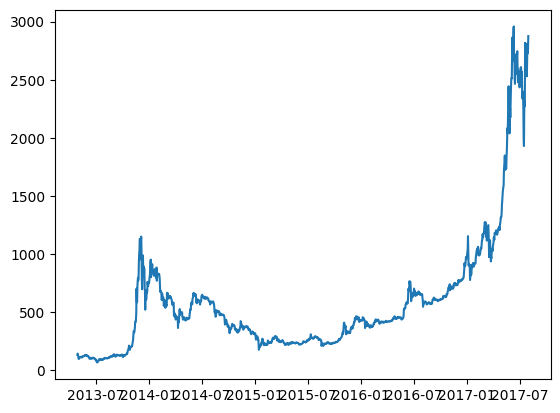

In [25]:
plt.plot(df['Close'], label='Bitcoin Close Price')

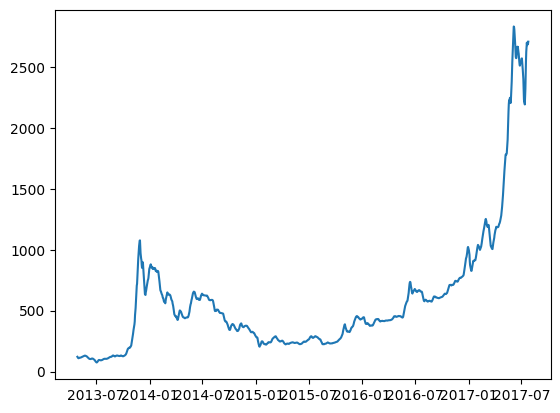

In [26]:
plt.plot(df['MA7'], label='7-day Moving Average')

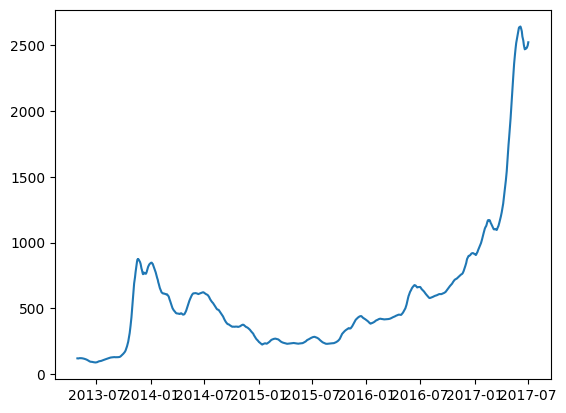

In [27]:
plt.plot(df['MA30'], label='30-day Moving Average')

In [34]:
df.head()

,Open,High,Low,Close,Volume,Market Cap,MA7,MA30
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,"45,535,800,000",NaN,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,"44,890,700,000",NaN,NaN
2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,"46,246,700,000",NaN,NaN
2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,"44,144,400,000",NaN,NaN
2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,"41,816,500,000",NaN,NaN


In [35]:
# Clean 'Market Cap' column
df['Market Cap'] = pd.to_numeric(df['Market Cap'].str.replace(',', ''), errors='coerce')


In [36]:
correlation_matrix = df.corr()

In [39]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.9 kB 1.3 MB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 798.9 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 853.3 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 748.1 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 692.9 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 719.7 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/294.9 kB 774.0 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 701.2 kB/s eta 0:00:00


In [41]:
import seaborn as sns

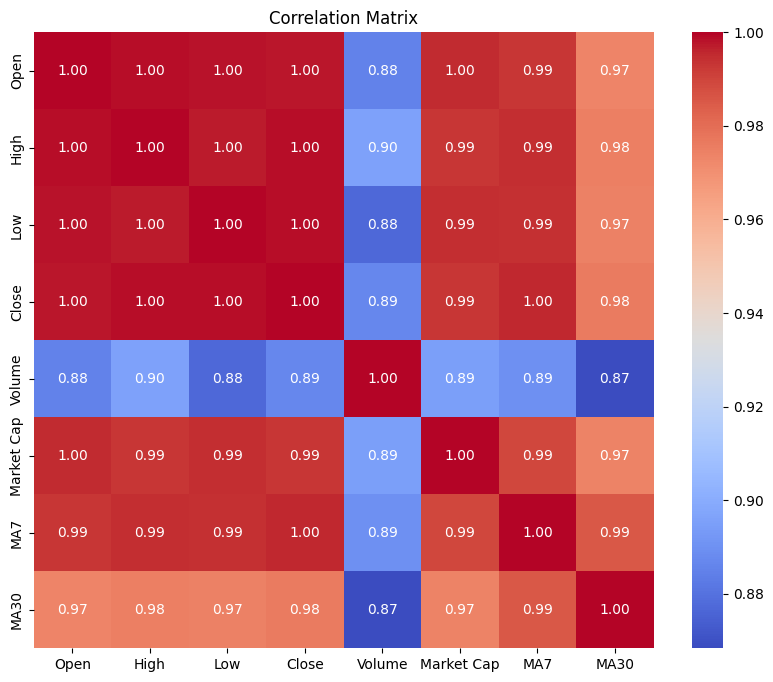

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()